In [1]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from dotenv import load_dotenv
load_dotenv()

True

### Toggle switch for GitHub
This notebook is auto generate. The next cell allows to create a static version of the notebook in order to have it available in GitHub view.

Please always call you figure using `interac_o_static(fig)`

In [2]:
def interac_o_static(fig):
    PLOTLY = os.getenv('PLOTLY')
    if PLOTLY == "interactive":
        return fig.show()
    else:
        return fig.show("png")

# Generate data
Before generate data don't forget :
- To know the number of uniq pair in a matrix : `sum(1 + i for i in range(0, #_size))`
    - To know the number of circuits from a certain matrix of [1,1] is gonna be 3 uniq pair and so 3 circuits.
    - You can run the code on [Wolfram Alpha](https://www.wolframalpha.com/input?i=sum+1%2Bn%2C+n%3D0+to+25)

#### Limit known
Today we know the Runtime have some limitations :
- Runtime seconds max around 3600 seconds (1h).
- Payload max 64MB

# Telemetry

In [3]:
tele_file = pd.read_feather("../resources/kernel_metadata/shared_telemetry_info.csv")
#list_width = tele_file["width"].tolist()
#list_layers = tele_file["layers"].tolist()
#list_shots = tele_file["shots"].tolist()
#list_program_id = tele_file["program"].tolist()
#list_circuit_id = tele_file["circuit_id"].tolist()
#list_job_id = tele_file["job_id"].tolist()
#list_time_queue = tele_file["time_queue"].tolist()
#list_time_simu = tele_file["time_simu"].tolist()
#list_payload_size = tele_file["payload_size"].tolist()
#list_nb_circuits = tele_file["nb_circuits"].tolist()
#list_comment = tele_file["comment"].tolist()

### Payload vs number of qubits
Look at (payload size / number of circuits) -- that is, the payload size per circuit -- versus number of qubits, where the number of layers is fixed to be 1. This tells us something about the data costs associated with generating 1 circuit for a fixed number of qubits.

#### Only 1 layer

Size of dataframe :  161


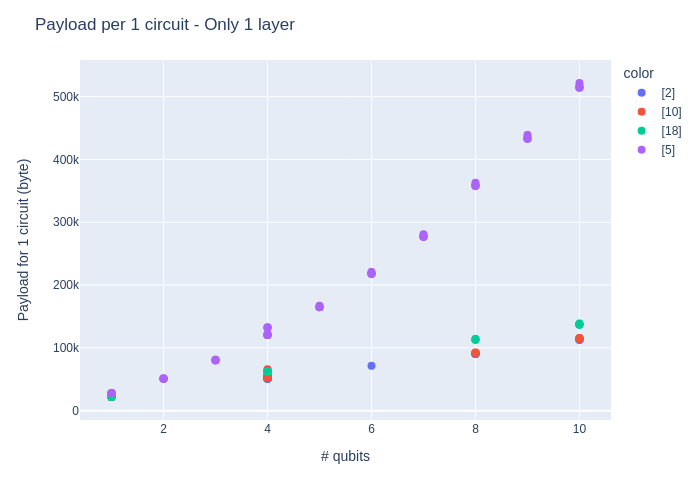

In [4]:
only1layer = tele_file.loc[tele_file['layers'] == 1]
olayer_layers = only1layer["layers"].tolist()
olayer_width = only1layer["width"].tolist()
olayer_payload_size = only1layer["payload_size"].tolist()
olayer_nb_circuits = only1layer["nb_circuits"].tolist()
olayer_circuit_id = only1layer["circuit_id"].tolist()

olayer_payload_per_circuit = []
for payload_size, nb_circuits in zip(olayer_payload_size, olayer_nb_circuits):
    olayer_payload_per_circuit.append(float(payload_size/nb_circuits))
    
print("Size of dataframe : ", len(olayer_payload_per_circuit))

fig = px.scatter(x=olayer_width, y=olayer_payload_per_circuit, color=olayer_circuit_id)

fig.update_traces(marker=dict(size=8))

fig.update_layout(title_text='Payload per 1 circuit - Only 1 layer',
                         xaxis_title="# qubits", yaxis_title="Payload for 1 circuit (byte)")

interac_o_static(fig)

#### All layers

Size of dataframe :  435


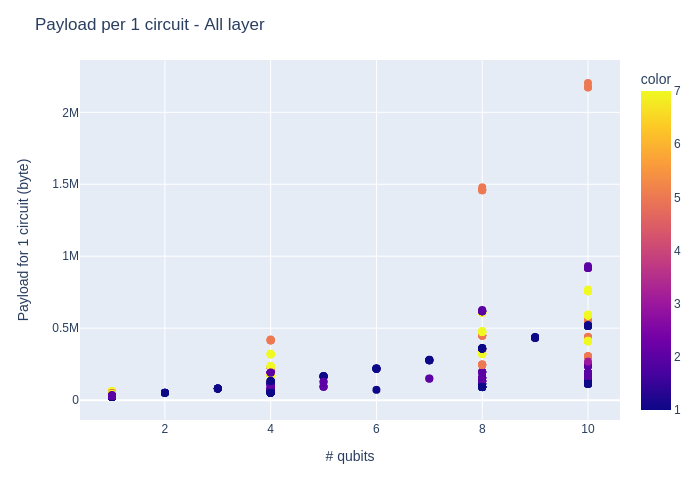

In [5]:
list_layers = tele_file["layers"].tolist()
list_width = tele_file["width"].tolist()
list_payload_size = tele_file["payload_size"].tolist()
list_nb_circuits = tele_file["nb_circuits"].tolist()

payload_per_circuit = []
for payload_size, nb_circuits in zip(list_payload_size, list_nb_circuits):
    payload_per_circuit.append(float(payload_size/nb_circuits))
    
print("Size of dataframe : ", len(payload_per_circuit))


fig = px.scatter(x=list_width, y=payload_per_circuit, color=list_layers)

fig.update_traces(marker=dict(size=8))

fig.update_layout(title_text='Payload per 1 circuit - All layer',
                         xaxis_title="# qubits", yaxis_title="Payload for 1 circuit (byte)")

interac_o_static(fig)

### Payload vs number of circuits
Look at payload size versus number of circuits. This tells us how payload size scales with the number of kernel values we're trying to calculate in 1 go.

Size of dataframe :  435


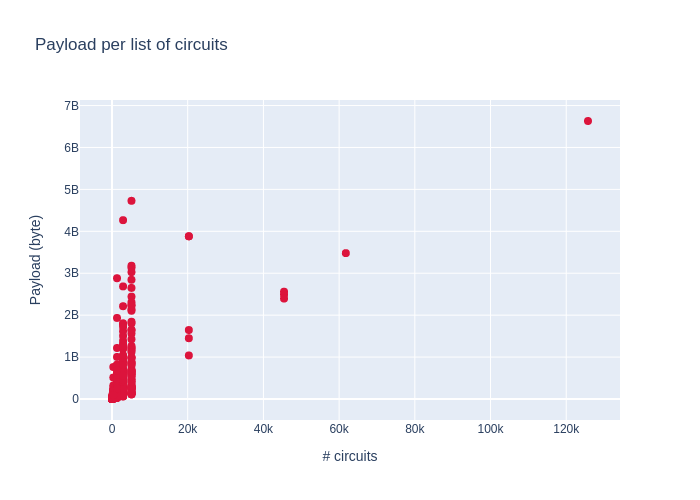

In [6]:
list_payload_size = tele_file["payload_size"].tolist()
list_nb_circuits = tele_file["nb_circuits"].tolist()
    
print("Size of dataframe : ", len(list_payload_size))

fig = go.Figure([go.Scatter(x=list_nb_circuits, y=list_payload_size, mode='markers',
                            marker=dict(color="crimson", size=8))])

fig.update_layout(title_text='Payload per list of circuits', 
                         xaxis_title="# circuits", yaxis_title="Payload (byte)")

interac_o_static(fig)

#### Analyse
...

#### Histogram
Histogram of payload size/number of circuits. Does there are any interesting features in the distribution ?

Size of dataframe :  435


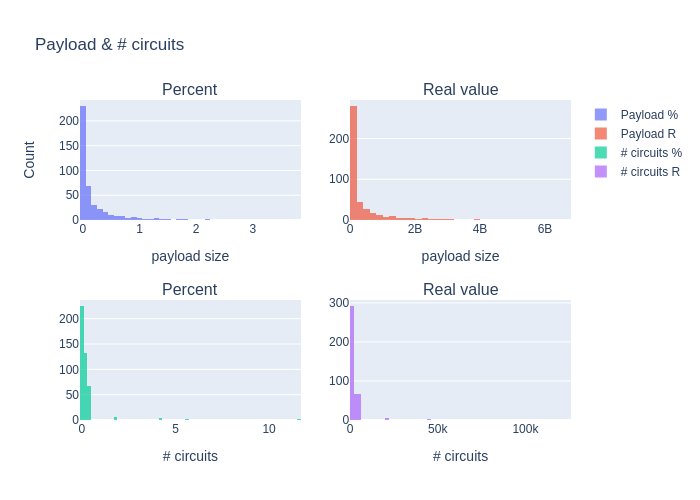

In [7]:
list_payload_size = tele_file["payload_size"].tolist()
list_nb_circuits = tele_file["nb_circuits"].tolist()

payload_size_percent = []
nb_circuits_percent = []

for payload_size, nb_circuits in zip(list_payload_size, list_nb_circuits):
    payload_size_percent.append(payload_size * 100 / sum(list_payload_size))
    nb_circuits_percent.append(nb_circuits * 100 / sum(list_nb_circuits))

print("Size of dataframe : ", len(payload_size_percent))

fig_series = make_subplots(rows=2, cols=2, subplot_titles=("Percent", "Real value", "Percent", "Real value"))

fig_series.add_trace(go.Histogram(x=payload_size_percent, name='Payload %'), row=1, col=1)
fig_series.add_trace(go.Histogram(x=list_payload_size, name='Payload R'), row=1, col=2)
fig_series.update_xaxes(title_text="payload size", row=1)

fig_series.add_trace(go.Histogram(x=nb_circuits_percent, name='# circuits %'), row=2, col=1)
fig_series.add_trace(go.Histogram(x=list_nb_circuits, name='# circuits R'), row=2, col=2)
fig_series.update_xaxes(title_text="# circuits", row=2)

fig_series.update_layout(
    title_text='Payload & # circuits',
    yaxis_title="Count",
    barmode="overlay")
fig_series.update_xaxes(title_text="# circuits", row=2)
fig_series.update_traces(opacity=0.7)

interac_o_static(fig_series)

### Cheryl here
Blabla doing that for that because we want to check that blablablabla...

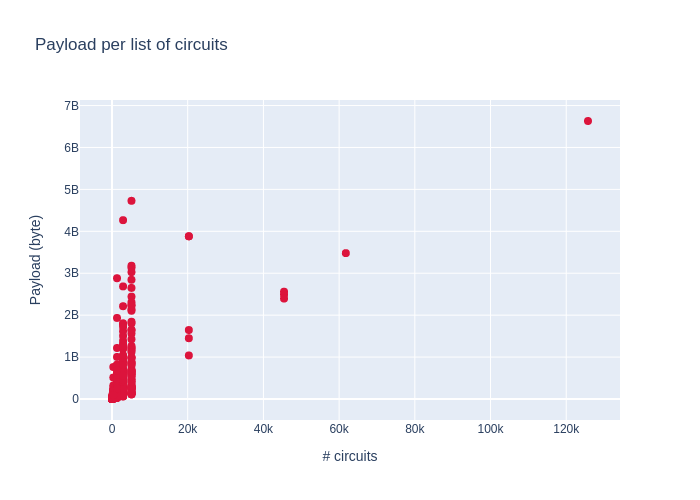

In [8]:
####### Code to generate the plot


#######
interac_o_static(fig) ## to the show the plot at the end

### Runtime seconds vs number of circuits
Time_simulation (aka, runtime-seconds) versus payload size. This helps us see what the cutoffs look like. For this plot, I would suggest plotting lines indicating the payload size at which the Runtime says it was too big, as well as the time past which the Runtime said it timed out.

Size of dataframe :  435


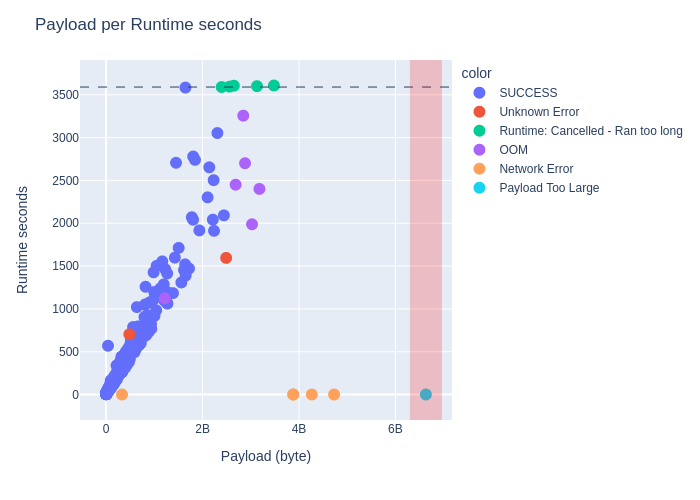

In [9]:
list_payload_size = tele_file["payload_size"].tolist()
list_time_simu = tele_file["time_simu"].tolist()
list_comment = tele_file["comment"].tolist()

exceed_payload = []
exceed_time = []
for time_simu, payload_size, comment in zip(list_time_simu, list_payload_size, list_comment):
    exceed_payload.append(payload_size) if comment == "Payload Too Large" else None
    exceed_time.append(time_simu) if comment == "Runtime: Cancelled - Ran too long" else None

print("Size of dataframe : ", len(list_payload_size))

#fig = px.scatter(x=list_time_simu, y=list_payload_size, color=list_comment)
#fig.add_hrect(y0=(min(exceed_payload)-min(exceed_payload)/20), y1=(max(exceed_payload)+max(exceed_payload)/20), 
              #line_width=0,line_color="red", fillcolor="red", opacity=0.2)
#fig.add_vline(x=min(exceed_time), fillcolor="green", line_width=1, line_dash="dash")
#fig.update_layout(title_text='Payload per Runtime seconds', 
                  #xaxis_title="Runtime seconds", yaxis_title="Payload (kb)")

fig = px.scatter(x=list_payload_size, y=list_time_simu, color=list_comment)
fig.add_hline(y=min(exceed_time), fillcolor="green", line_width=1, line_dash="dash")
fig.add_vrect(x0=(min(exceed_payload)-min(exceed_payload)/20), x1=(max(exceed_payload)+max(exceed_payload)/20), 
              line_width=0,line_color="red", fillcolor="red", opacity=0.2)
fig.update_layout(title_text='Payload per Runtime seconds', 
                  xaxis_title="Payload (byte)", yaxis_title="Runtime seconds")

fig.update_traces(marker=dict(size=12))

interac_o_static(fig)

# Annexes

## Acronyms & Terms
- `SUCCESS` : Job successfully submit and finished
- `OOM` : Out Of Memory from Runtime job
- `Runtime: Cancelled - Ran too long` : Timeout from Runtime
- `Payload Too Large` : List of circuits too big or len of payload too big
- `Network Error` : Error 500 when sending job to Runtime
- `Unknown Error` : Error not identified yet
- `Runtime seconds` : Operational time taking by the job also known as `time_simu`
- `time_queue` : Time waited by the job in the queue

## Full dataset
Uncomment the next cell or call it as you like

In [10]:
#tele_file